In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from itertools import combinations
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
dados = pd.read_csv('creditcustomersegmentation.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dados = dados.drop(['CUST_ID', 'TENURE'], axis=1)
dados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [4]:
missing = dados.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [5]:
dados.fillna(dados.median(), inplace=True)
missing = dados.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Qual modelo de normalização usar? 

Função StandardScaler() --> Útil para dados que estão em diferentes escalas e possuem diferentes unidades de medida.

Função Normalizer() --> Útil para dados que possuem escalas similares, porém possuem unidades de medidas diferentes.

Nesse caso, deve utilizar o Normalizer().

In [6]:
values = Normalizer().fit_transform(dados.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [7]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
#Forçando o algoritmo a entregar 10x os mesmos valores
#Algoritmo itera 300x
y_pred = kmeans.fit_predict(values)
y_pred

array([1, 0, 1, ..., 1, 1, 2])

In [8]:
y_pred = pd.DataFrame(y_pred)
dados['Cluster'] = y_pred
dados['Cluster']

0       1
1       0
2       1
3       1
4       3
       ..
8945    1
8946    1
8947    1
8948    1
8949    2
Name: Cluster, Length: 8950, dtype: int32

Etapa de validação dos clusters.

Critérios de Validação:

Compactação --> Quão próximos estão os pontos em um mesmo cluster.

Separação --> Qual bem separados os pontos de clusters diferentes estão.



Coeficiente do Silhouette 

s = (b - a)/ (max(a, b))

a --> Distância média entre um ponto específico de um cluster, em relação aos outros pontos do mesmo cluster.

b --> Distância média entro o ponto e todos os outros pontos do cluster mais próximo.






In [9]:
#Métrica do Silhoutette
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.3645909946966366

Coeficiente de Davies-Bouldin

DB = 1/K * SOMA de 1 a K (máx i!=j --> Rij)

Rij --> Medidas de similaridade entre dois clusters i e j

Rij = (Si + Sj) / dij

S --> Distância média entre cada ponto do clusters e o seu centroide.

d --> Distância entre centroides dos clusters.




In [10]:
#Métrica Davies-Bouldin
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.074957504911719

In [11]:
#Métrica Calinski
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.784281732806

In [12]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [13]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.440519908274


In [14]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36450776610378255 1.0756524896040585 3431.797438360455


In [15]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3501170769038028 1.1211615454474617 3018.956533137262


Devido o contexto do problema, deve ser escolhido 5 clusters, pois com n_clusters = 5, temos o maior número para esse indicador, que é mais relevante.

In [16]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03945426500070919 3.5338573622525273 302.6111793738818
0.36450776610378255 1.0756524896040585 3431.797438360455


In [17]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36917231372515974 1.053154050699893 1204.0366202023079
0.35406999696241026 1.1389554530299943 1194.9454119497238
0.36703406528773175 1.09892070856634 1167.5339286226883


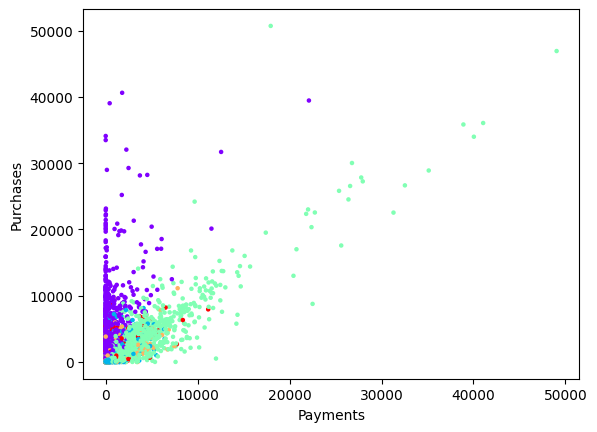

In [18]:
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Payments')
plt.ylabel('Purchases')
plt.show()

In [19]:
dados.groupby('Cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
Cluster                                                             
0        1072.0  1795.962694  1982.710235   0.000000   506.925348   
1        3281.0   443.767052   846.269966   0.000000    23.390230   
2        1538.0  1143.654411  1664.643671   0.000000   212.513230   
3        2651.0  3036.509818  2478.358491   6.824905  1257.895616   
4         408.0  1990.318603  1860.968409  70.794108  1016.567882   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
Cluster                                                                       
0        1092.020518  2316.353276  14581.459140            1072.0  0.862028   
1          82.980060   411.727643   9630.367575            3281.0  0.774457   
2         555.745265  1371.943854  19043.138560            1538.0  0.928314   
3        2171.222526  4223.849965  18495.558550            2651.0  0.963809   
4        1326.681742  2149.639085  11670.179850             408.0  0.989409   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
Cluster  ...                                                             
0        ...       886.834603  21235.065300           1072.0  0.117291   
1        ...       248.700571   4483.503862           3281.0  0.246761   
2        ...       524.765832  18621.013310           1538.0  0.278077   
3        ...      1330.279644   8345.641905           2651.0  0.001798   
4        ...      7184.162991  76406.207520            408.0  0.019460   

                                                      
              std  min  25%       50%       75%  max  
Cluster                                               
0        0.186887  0.0  0.0  0.083333  0.142857  1.0  
1        0.346705  0.0  0.0  0.000000  0.444444  1.0  
2        0.366978  0.0  0.0  0.083333  0.545455  1.0  
3        0.023251  0.0  0.0  0.000000  0.000000  0.6  
4        0.091220  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

Agora deve-se analisar a variância dos centróides para certos atributos. 

Vamos pegar 5 clusters e um atritbuto, e vammos ver como esse valor se comporta dentro dos 5 clusters

In [20]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35381511e-01 2.16386309e-04 6.03507202e-02 3.42616866e-02
  2.60942482e-02 4.00490934e-01 5.26828298e-05 2.04120300e-05
  3.52940269e-05 6.55205582e-05 1.57229933e-03 1.12294075e-03
  5.34785558e-01 5.97895570e-01 1.04559121e-01 2.77193397e-05]
 [6.91301537e-02 2.30765086e-04 1.21502301e-01 4.80067869e-02
  7.35956821e-02 2.45411917e-02 1.72786944e-04 3.36773370e-05
  1.40242797e-04 7.95234417e-06 1.25366124e-04 2.86281946e-03
  9.43495432e-01 1.53853364e-01 5.68593093e-02 7.61128894e-05]
 [1.60258436e-01 2.45144673e-04 4.38368733e-01 2.57024917e-01
  1.81515326e-01 2.58391892e-02 2.04284487e-04 8.90227499e-05
  1.50518309e-04 9.38121195e-06 1.69681064e-04 6.17106187e-03
  6.03767000e-01 4.02642344e-01 8.56243176e-02 7.18597959e-05]
 [5.04526580e-01 2.72332745e-04 6.20171708e-02 3.64414607e-02
  2.55974069e-02 2.52329514e-01 6.75600478e-05 2.58663568e-05
  4.51550497e-05 5.73437494e-05 1.15422756e-03 1.33589087e-03
  7.18989200e-01 1.66362861e-01 1.79601509e-01 5.51886878e-07]
 [3.

Precisamos encontrar os atributos que mais variam entre clusters.

Para assim encontrarmos especificidades entre os cluster.

In [21]:
#Calculando a variância em cada um dos atributos
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i], '\n{:.4f}'.format(centroids[:, i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0362
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0549
PRC_FULL_PAYMENT 
0.0000


## **Deve-se escolher para análise de cluster, as variáveis que possuem maiores variações, são elas**

*BALANCE: 0.0224*

*PURCHASE: 0.0197*

*CASH_ADVANCE: 0.02269*

*MINIMUM_PAYMENTS: 0.0546*

*CREDIT_LIMIT: 0.0360*

*PAYMENTS: 0.0279*

In [22]:
colunas = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
description = dados.groupby('Cluster')[colunas]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
Cluster,,,,,,
0,1795.962694,475.754011,3273.107356,3976.838817,4709.923544,1072
1,443.767052,629.212624,141.652025,5129.746043,814.456295,3281
2,1143.654411,3272.524233,183.257394,4101.469539,3040.522067,1538
3,3036.509818,385.376134,1634.262935,4493.115805,968.393476,2651
4,1990.318603,856.504755,424.225892,2231.985294,1340.280120,408


In [23]:
dados.groupby('Cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1072.0,0.117291,0.186887,0.0,0.0,0.083333,0.142857,1.0
1,3281.0,0.246761,0.346705,0.0,0.0,0.000000,0.444444,1.0
2,1538.0,0.278077,0.366978,0.0,0.0,0.083333,0.545455,1.0
3,2651.0,0.001798,0.023251,0.0,0.0,0.000000,0.000000,0.6
4,408.0,0.019460,0.091220,0.0,0.0,0.000000,0.000000,1.0


# *Análise de Clusters*

*Agora, é importante que haja não só o conhecimento em Tech, mas também, o conhecimento de negócios financeiros aplicados ao Marketing. Para que assim, possa ser entendido o comportamento dos clientes do banco e o Teste A/B e estratégia de Marketing sejam aplicados*

**Cluster 0: Clientes que gastam muito com saques. Pagadores medianos.**

**Cluster 1: Clientes que gastam pouco. Possuem o maior limite. São bons pagadores. Maior número de clientes.**

**Cluster 2: Clientes com menor limite. Não são bons pagadores. Menor quantidade de clientes.**

**Cluster 3: Clientes que mais gastam, com foco em saque. São os piores pagadores. Boa quantidade de clientes.**

**Cluster 4: Clientes que gastam muito com compras. Melhores pagadores.**

*Cluster 0: Cliente Padrão --> Gastam uma certa quantidade e pagam de uma forma mediana.*

*Cluster 1: Cliente Premium --> Poder aquisitivo alto, porém não realizam muitas compras.*

*Cluster 2: Clientes Ruins --> Não possuem limites altos por quê não pagam seus cartões.*

*Cluster 3: Clientes Ruins --> Conseguem sacar, porém atrasam o pagamento.*

*Cluster 4: Clientes Premium --> Realizam compras e pagam, pode-se dizer que possuem poder aquisitivo alto.*

## **Síntese:**

Com base na análise decide-se trabalhar uma estratégia de marketing em cima do Cluster 1.

Vai ser utilizado o Teste AB, onde irá ser separado dois grupos: Controle e Teste.

Controle --> Não irá ser submetido ao teste
Teste --> Será testado.

Será validado com o tempo.

Caso o resultado do objetivo seja o mesmo para os dois, talvez a estrátegia de mkt não seja tão efetiva